In [33]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
# the measurements
sim_dict_B_means = {'sink-based': np.float64(45.36),
                    'source-based': np.float64(70.8),
                    'top-c': np.float64(97.49),
                    'tree': np.float64(94.42),
                    'cl-sf': np.float64(46.88),
                    'cl-tree-sf': np.float64(85.0),
                    'nova': np.float64(53.24),
                    'nova (p)': np.float64(71.11)}

sim_dict_B_quantiles = {'sink-based': np.float64(64.6),
                        'source-based': np.float64(125.0),
                        'top-c': np.float64(147.0),
                        'tree': np.float64(151.85),
                        'cl-sf': np.float64(66.72),
                        'cl-tree-sf': np.float64(135.21),
                        'nova': np.float64(73.0),
                        'nova (p)': np.float64(96.1)}

fit_dict_means = {'sink-based': np.float64(16.32),
                  'source-based': np.float64(21.24),
                  'top-c': np.float64(38.74),
                  'tree': np.float64(34.0),
                  'cl-sf': np.float64(18.09),
                  'cl-tree-sf': np.float64(34.07),
                  'nova': np.float64(17.88),
                  'nova (p)': np.float64(30.05)}

fit_dict_quantiles = {'sink-based': np.float64(25.0),
                      'source-based': np.float64(36.1),
                      'top-c': np.float64(64.0),
                      'tree': np.float64(56.77),
                      'cl-sf': np.float64(28.48),
                      'cl-tree-sf': np.float64(60.71),
                      'nova': np.float64(27.0),
                      'nova (p)': np.float64(39.3)}

king_dict_means = {'sink-based': np.float64(300.18),
                   'source-based': np.float64(354.85),
                   'top-c': np.float64(487.33),
                   'tree': np.float64(639.63),
                   'cl-sf': np.float64(322.48),
                   'cl-tree-sf': np.float64(536.22),
                   'nova': np.float64(313.5),
                   'nova (p)': np.float64(439.01)}

king_dict_quantiles = {'sink-based': np.float64(408.0),
                       'source-based': np.float64(501.7),
                       'top-c': np.float64(711.7),
                       'tree': np.float64(1072.49),
                       'cl-sf': np.float64(427.03),
                       'cl-tree-sf': np.float64(747.81),
                       'nova': np.float64(430.0),
                       'nova (p)': np.float64(583.0)}

pl_dict_means = {'sink-based': np.float64(77.42),
                 'source-based': np.float64(102.26),
                 'top-c': np.float64(142.66),
                 'tree': np.float64(99.17),
                 'cl-sf': np.float64(79.29),
                 'cl-tree-sf': np.float64(120.67),
                 'nova': np.float64(88.91),
                 'nova (p)': np.float64(185.86)}

pl_dict_quantiles = {'sink-based': np.float64(235.0),
                     'source-based': np.float64(246.0),
                     'top-c': np.float64(269.2),
                     'tree': np.float64(292.62),
                     'cl-sf': np.float64(237.28),
                     'cl-tree-sf': np.float64(339.23),
                     'nova': np.float64(235.0),
                     'nova (p)': np.float64(286.8)}

atlas_dict_means = {'sink-based': np.float64(220.53),
                    'source-based': np.float64(261.72),
                    'top-c': np.float64(345.6),
                    'tree': np.float64(512.43),
                    'cl-sf': np.float64(231.15),
                    'cl-tree-sf': np.float64(450.65),
                    'nova': np.float64(237.68),
                    'nova (s=0.2)': np.float64(216.09),
                    'nova (p)': np.float64(302.33)}

atlas_dict_quantiles = {'sink-based': np.float64(327.6),
                        'source-based': np.float64(387.4),
                        'top-c': np.float64(520.4),
                        'tree': np.float64(733.91),
                        'cl-sf': np.float64(343.17),
                        'cl-tree-sf': np.float64(612.39),
                        'nova': np.float64(347.4),
                        'nova (s=0.2)': np.float64(340.0),
                        'nova (p)': np.float64(424.0)}

In [35]:
approaches_dict = {
    #"sim_A": [sim_dict_A_means, sim_dict_A_quantiles],
    "sim": [sim_dict_B_means, sim_dict_B_quantiles],
    "fit": [fit_dict_means, fit_dict_quantiles],
    "king": [king_dict_means, king_dict_quantiles],
    "pl": [pl_dict_means, pl_dict_quantiles],
    "atlas": [atlas_dict_means, atlas_dict_quantiles]
}
print("Topologies:", list(approaches_dict.keys()))
print("Approaches:", list(sim_dict_B_means.keys()))

Topologies: ['sim', 'fit', 'king', 'pl', 'atlas']
Approaches: ['sink-based', 'source-based', 'top-c', 'tree', 'cl-sf', 'cl-tree-sf', 'nova', 'nova (p)']


In [36]:
columns = ['sink-based', 'source-based', 'tree', 'cl-sf', 'cl-tree-sf', 'top-c', 'nova', 'nova (p)']
rows = ['sim', 'fit', 'king', 'pl', 'atlas']

In [37]:
# Organize the data into a dictionary of dictionaries for means and quantiles
means_dict = {key: approaches_dict[key][0] for key in rows}
quantiles_dict = {key: approaches_dict[key][1] for key in rows}

# Create two DataFrames: one for means and one for quantiles
df_means = pd.DataFrame(means_dict).T[columns]
df_quantiles = pd.DataFrame(quantiles_dict).T[columns]

In [38]:
df_means

,sink-based,source-based,tree,cl-sf,cl-tree-sf,top-c,nova,nova (p)
sim,45.36,70.80,94.42,46.88,85.00,97.49,53.24,71.11
fit,16.32,21.24,34.00,18.09,34.07,38.74,17.88,30.05
king,300.18,354.85,639.63,322.48,536.22,487.33,313.50,439.01
pl,77.42,102.26,99.17,79.29,120.67,142.66,88.91,185.86
atlas,220.53,261.72,512.43,231.15,450.65,345.60,237.68,302.33


In [39]:
df_quantiles

,sink-based,source-based,tree,cl-sf,cl-tree-sf,top-c,nova,nova (p)
sim,64.6,125.0,151.85,66.72,135.21,147.0,73.0,96.1
fit,25.0,36.1,56.77,28.48,60.71,64.0,27.0,39.3
king,408.0,501.7,1072.49,427.03,747.81,711.7,430.0,583.0
pl,235.0,246.0,292.62,237.28,339.23,269.2,235.0,286.8
atlas,327.6,387.4,733.91,343.17,612.39,520.4,347.4,424.0


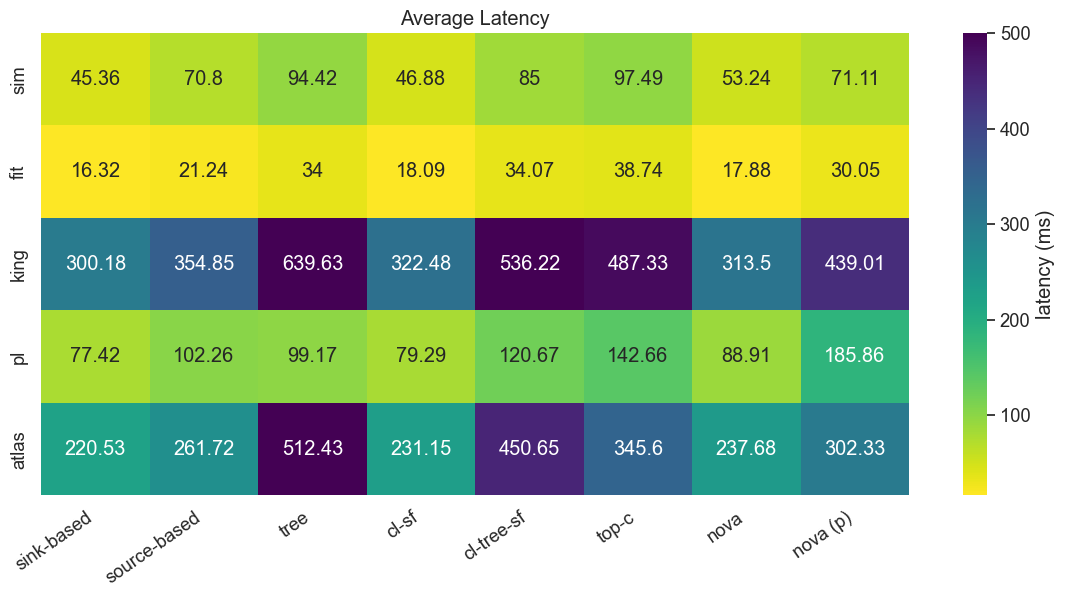

In [40]:
# create the heatmap
df = df_means.copy()
plt.figure(figsize=(14, 6))
sns.set_theme(font_scale=1.2)
sns.heatmap(df, annot=True, cmap='viridis_r', vmax=500, cbar_kws={'label': 'latency (ms)'}, xticklabels=columns,
            cbar=True, yticklabels=rows, fmt='g')

# Rotate xtick labels
plt.xticks(rotation=35, ha='right')

# show the plot
plt.savefig("plots/heatmap_means.svg", bbox_inches='tight')
plt.title("Average Latency")
plt.show()

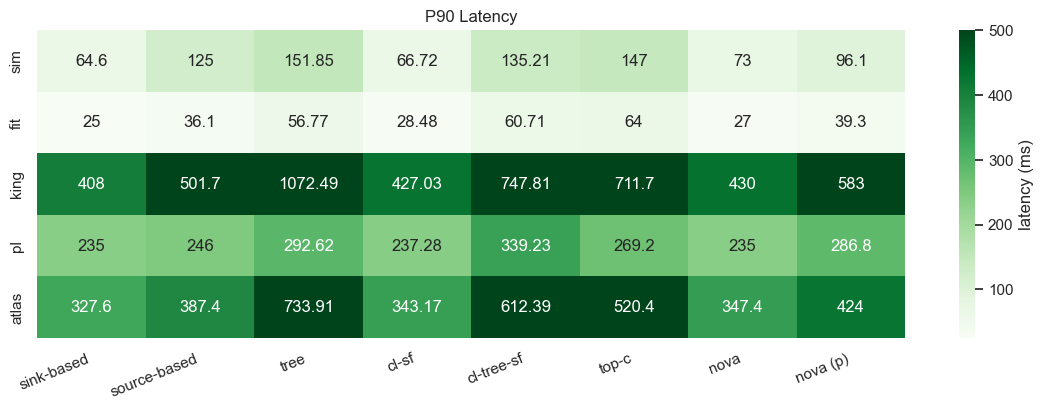

In [41]:
# create the heatmap
df = df_quantiles.copy()
plt.figure(figsize=(14, 4))
sns.set_theme(font_scale=1)
sns.heatmap(df, annot=True, cmap='Greens', vmax=500, cbar_kws={'label': 'latency (ms)'}, xticklabels=columns,
            cbar=True, yticklabels=rows, fmt='g')

# Rotate xtick labels
plt.xticks(rotation=22, ha='right')

# show the plot
plt.savefig("plots/heatmap_p90.svg", bbox_inches='tight')
plt.title("P90 Latency")
plt.show()

In [42]:
def custom_formatter(value):
    if value >= 1e6:
        return f'{value / 1e6:.1f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.1f}k'
    else:
        return f'{value:.2f}'


# create the heatmap
df = df_means.copy()
df = df.subtract(df.min(axis=1), axis=0)
df = df.drop("sink-based", axis=1)

df2 = df.map(custom_formatter)
df2

,source-based,tree,cl-sf,cl-tree-sf,top-c,nova,nova (p)
sim,25.44,49.06,1.52,39.64,52.13,7.88,25.75
fit,4.92,17.68,1.77,17.75,22.42,1.56,13.73
king,54.67,339.45,22.30,236.04,187.15,13.32,138.83
pl,24.84,21.75,1.87,43.25,65.24,11.49,108.44
atlas,41.19,291.90,10.62,230.12,125.07,17.15,81.80


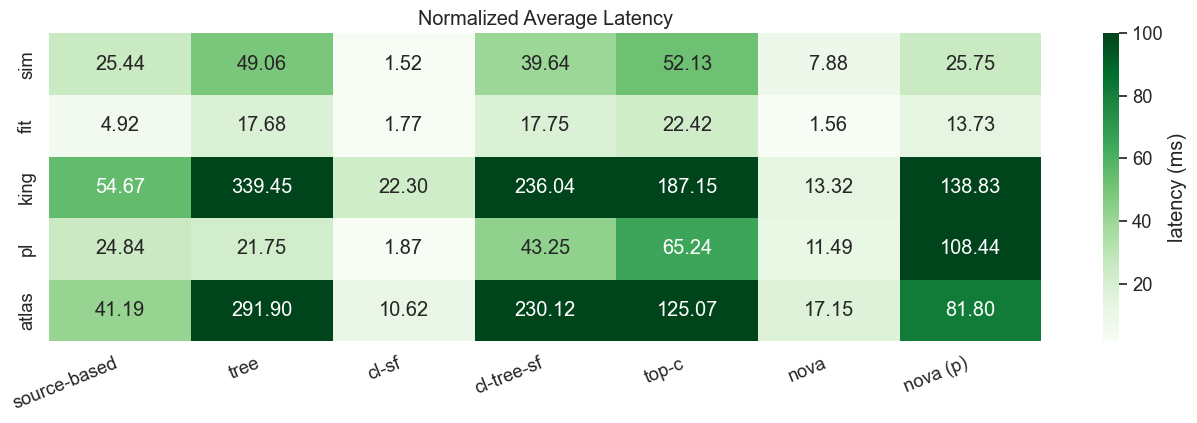

In [43]:
plt.figure(figsize=(16, 4))
sns.set_theme(font_scale=1.2)
heatmap = sns.heatmap(df, annot=df2, cmap='Greens', vmax=100, cbar_kws={'label': 'latency (ms)'}, cbar=True,
                      xticklabels=columns[1:],
                      yticklabels=rows, fmt='')

# rotate y-tick labels
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=90)

# Customize colorbar ticks
#colorbar = heatmap.collections[0].colorbar
#ticks = colorbar.get_ticks()
#ticks = [f'{tick:.2f}x' for tick in ticks]
#colorbar.set_ticks(colorbar.get_ticks())
#colorbar.set_ticklabels(ticks)

# Rotate xtick labels
plt.xticks(rotation=22, ha='right')

# show the plot
plt.savefig("plots/heatmap_means_norm_reduced.svg", bbox_inches='tight')
plt.title("Normalized Average Latency")
plt.show()

In [44]:
# create the heatmap
df = df_quantiles.copy()
df = df.subtract(df.min(axis=1), axis=0)
df = df.drop("sink-based", axis=1)
df2 = df.map(custom_formatter)
df

,source-based,tree,cl-sf,cl-tree-sf,top-c,nova,nova (p)
sim,60.4,87.25,2.12,70.61,82.4,8.4,31.5
fit,11.1,31.77,3.48,35.71,39.0,2.0,14.3
king,93.7,664.49,19.03,339.81,303.7,22.0,175.0
pl,11.0,57.62,2.28,104.23,34.2,0.0,51.8
atlas,59.8,406.31,15.57,284.79,192.8,19.8,96.4


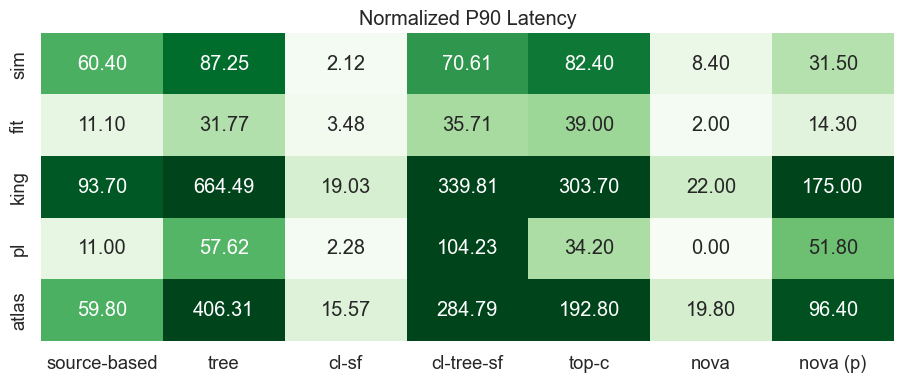

In [45]:
plt.figure(figsize=(11, 4))
sns.set_theme(font_scale=1.2)
heatmap = sns.heatmap(df, annot=df2, cmap='Greens', vmax=100, cbar_kws={'label': 'relative latency (ms)'}, cbar=False,
                      xticklabels=columns[1:],
                      yticklabels=rows, fmt='')

# rotate y-tick labels
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=90)

# Customize colorbar ticks
colorbar = heatmap.collections[0].colorbar
if colorbar is not None:
    ticks = colorbar.get_ticks()
    ticks = [f'{tick:.2f}x' for tick in ticks]
    colorbar.set_ticks(colorbar.get_ticks())
    colorbar.set_ticklabels(ticks)

# Rotate xtick labels
plt.xticks(rotation=0, ha='center')

# show the plot
plt.savefig("plots/heatmap_p90_delta_reduced.svg", bbox_inches='tight')
plt.title("Normalized P90 Latency")
plt.show()

In [46]:
atlas_filtered_rtt_means = {'sink-based': np.float64(146.39), 'source-based': np.float64(262.91),
                            'top-c': np.float64(330.26), 'tree': np.float64(11690.35), 'cl-sf': np.float64(335.18),
                            'cl-tree-sf': np.float64(1916.32), 'nova': np.float64(259.74),
                            'nova (s=0.2)': np.float64(215.29),
                            'nova (p)': np.float64(379.21)}

atlas_filtered_rtt_quants = {'sink-based': np.float64(386.6), 'source-based': np.float64(662.9),
                             'top-c': np.float64(708.7), 'tree': np.float64(19178.3), 'cl-sf': np.float64(782.1),
                             'cl-tree-sf': np.float64(3056.2), 'nova': np.float64(541.5),
                             'nova (s=0.2)': np.float64(424.2), 'nova (p)': np.float64(753.9)}

In [47]:
atlas_dict_means.keys()

dict_keys(['sink-based', 'source-based', 'top-c', 'tree', 'cl-sf', 'cl-tree-sf', 'nova', 'nova (s=0.2)', 'nova (p)'])

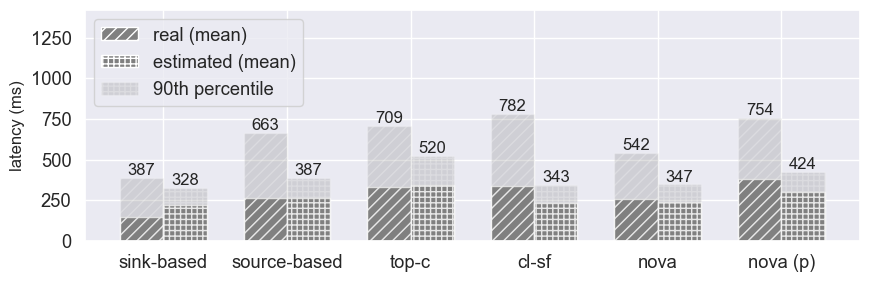

In [53]:
# Data
methods = ['sink-based', 'source-based', 'top-c', 'cl-sf', 'nova', 'nova (p)']
rtt_means = [atlas_filtered_rtt_means[key] for key in methods]
rtt_quants = [atlas_filtered_rtt_quants[key] for key in methods]
ncs_means = [atlas_dict_means[key] for key in methods]
ncs_quants = [atlas_dict_quantiles[key] for key in methods]

# Bar width
bar_width = 0.35

# Set positions for the bars
rtt_positions = np.arange(len(methods))
ncs_positions = rtt_positions + bar_width

# Create subplots
fig, ax = plt.subplots(figsize=(10, 3))

ax.bar(rtt_positions, rtt_means, width=bar_width, label='real (mean)', color='grey', hatch='///')
ax.bar(rtt_positions, rtt_quants, width=bar_width, alpha=0.25, color='grey', hatch='///')

# Create bar plot for NCS
ax.bar(ncs_positions, ncs_means, width=bar_width, label='estimated (mean)', color='grey', hatch='+++')
ax.bar(ncs_positions, ncs_quants, width=bar_width, label='90th percentile', alpha=0.25, color='grey', hatch='+++')

# Add text labels for RTT quantiles
for i, value in enumerate(rtt_quants):
    ax.text(rtt_positions[i], rtt_quants[i] + 0.05, f'{value:.0f}', ha='center', va='bottom', fontsize=12)

# Add text labels for NCS quantiles
for i, value in enumerate(ncs_quants):
    ax.text(ncs_positions[i], ncs_quants[i] + 0.05, f'{value:.0f}', ha='center', va='bottom', fontsize=12)

# Customize plot
ax.set_ylabel('latency (ms)')
# ax.set_title('Means and Quantiles for RTT and NCS')
ax.set_xticks(rtt_positions + bar_width / 2)
ax.set_xticklabels(methods)

max_y = ax.get_ylim()[1]
# Set y-axis limit slightly higher to make space for labels
ax.set_ylim(0, max_y + 600)

ax.legend(loc="upper left")
ax.yaxis.label.set_size(12)
ax.xaxis.label.set_size(12)

# Show plot
plt.savefig("plots/comparison_rtt_ncs_atlas.svg", bbox_inches='tight')
plt.show()

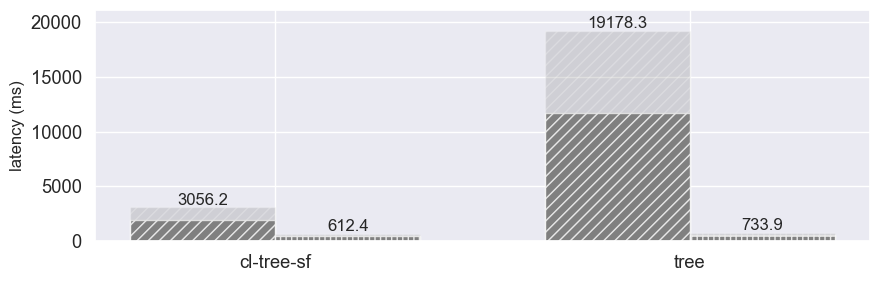

In [54]:
# Data
methods = ['cl-tree-sf', 'tree']
rtt_means = [atlas_filtered_rtt_means[key] for key in methods]
rtt_quants = [atlas_filtered_rtt_quants[key] for key in methods]
ncs_means = [atlas_dict_means[key] for key in methods]
ncs_quants = [atlas_dict_quantiles[key] for key in methods]

# Bar width
bar_width = 0.35

# Set positions for the bars
rtt_positions = np.arange(len(methods))
ncs_positions = rtt_positions + bar_width

# Create subplots
fig, ax = plt.subplots(figsize=(10, 3))

ax.bar(rtt_positions, rtt_means, width=bar_width, label='real (mean)', color='grey', hatch='///')
ax.bar(rtt_positions, rtt_quants, width=bar_width, alpha=0.25, color='grey', hatch='///')

# Create bar plot for NCS
ax.bar(ncs_positions, ncs_means, width=bar_width, label='estimated (mean)', color='grey', hatch='+++')
ax.bar(ncs_positions, ncs_quants, width=bar_width, label='90th percentile', alpha=0.25, color='grey', hatch='+++')

# Add text labels for RTT quantiles
for i, value in enumerate(rtt_quants):
    ax.text(rtt_positions[i], rtt_quants[i] + 0.05, f'{value:.1f}', ha='center', va='bottom', fontsize=12)

# Add text labels for NCS quantiles
for i, value in enumerate(ncs_quants):
    ax.text(ncs_positions[i], ncs_quants[i] + 0.05, f'{value:.1f}', ha='center', va='bottom', fontsize=12)

# Customize plot
ax.set_ylabel('latency (ms)')
# ax.set_title('Means and Quantiles for RTT and NCS')
ax.set_xticks(rtt_positions + bar_width / 2)
ax.set_xticklabels(methods)

max_y = ax.get_ylim()[1]
# Set y-axis limit slightly higher to make space for labels
ax.set_ylim(0, max_y + 1000)

# ax.legend()
ax.yaxis.label.set_size(12)
ax.xaxis.label.set_size(12)

# Show plot
plt.savefig("plots/comparison_rtt_ncs_atlas_trees.svg", bbox_inches='tight')
plt.show()